# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Carregando a base de dados
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
gorjetas = pd.read_csv(url)

In [3]:
# Criando as variáveis necessárias
gorjetas['tip_pct'] = gorjetas['tip'] / gorjetas['total_bill']  # Percentual da gorjeta
gorjetas['net_bill'] = gorjetas['total_bill'] - gorjetas['tip']  # Conta líquida
gorjetas['intercept'] = 1

# Ajustando o modelo de regressão de tip_pct por net_bill
X = gorjetas[['net_bill', 'intercept']]
y = gorjetas['tip_pct']
modelo = sm.OLS(y, X).fit()

# Exibindo os resultados do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     56.25
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           1.21e-12
Time:                        23:44:51   Log-Likelihood:                 361.93
No. Observations:                 244   AIC:                            -719.9
Df Residuals:                     242   BIC:                            -712.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
net_bill      -0.0033      0.000     -7.500      0.0

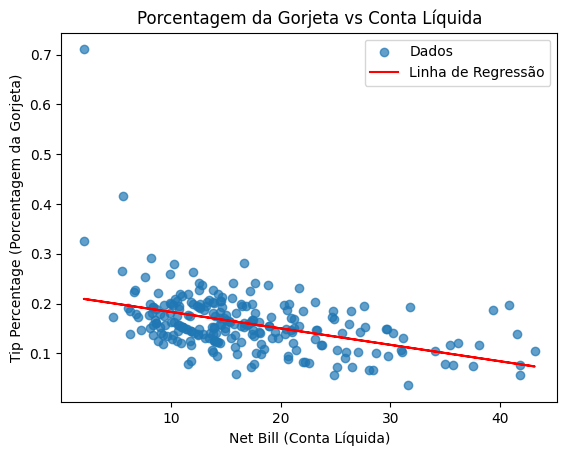

In [4]:
# Gráfico de dispersão
plt.scatter(gorjetas['net_bill'], gorjetas['tip_pct'], alpha=0.7, label='Dados')
plt.plot(gorjetas['net_bill'], modelo.predict(X), color='red', label='Linha de Regressão')
plt.xlabel('Net Bill (Conta Líquida)')
plt.ylabel('Tip Percentage (Porcentagem da Gorjeta)')
plt.title('Porcentagem da Gorjeta vs Conta Líquida')
plt.legend()
plt.show()

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [5]:
# Filtrando valores válidos para net_bill (maiores que zero)
gorjetas = gorjetas[gorjetas['net_bill'] > 0].copy()

# Criando a variável do logaritmo de net_bill
gorjetas['log_net_bill'] = np.log(gorjetas['net_bill'])

# Ajustando o modelo de regressão de tip_pct por log_net_bill
X_log = gorjetas[['log_net_bill', 'intercept']]
y = gorjetas['tip_pct']
modelo_log = sm.OLS(y, X_log).fit()

# Exibindo os resultados do modelo
print(modelo_log.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     98.21
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           1.19e-19
Time:                        23:45:12   Log-Likelihood:                 377.99
No. Observations:                 244   AIC:                            -752.0
Df Residuals:                     242   BIC:                            -745.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
log_net_bill    -0.0686      0.007     -9.910   

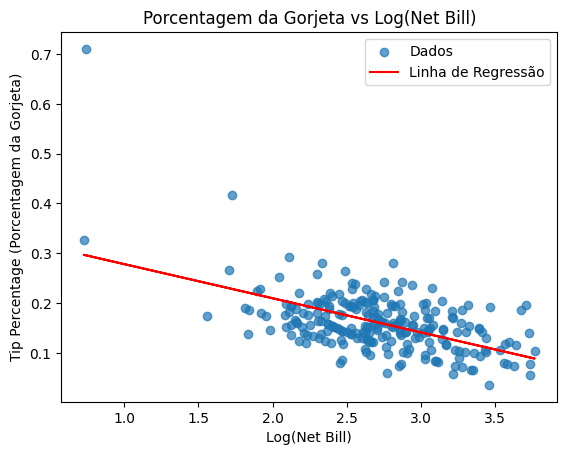

In [6]:
# Gráfico de dispersão
plt.scatter(gorjetas['log_net_bill'], gorjetas['tip_pct'], alpha=0.7, label='Dados')
plt.plot(gorjetas['log_net_bill'], modelo_log.predict(X_log), color='red', label='Linha de Regressão')
plt.xlabel('Log(Net Bill)')
plt.ylabel('Tip Percentage (Porcentagem da Gorjeta)')
plt.title('Porcentagem da Gorjeta vs Log(Net Bill)')
plt.legend()
plt.show()

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [7]:
# Criando as variáveis para o polinômio de segundo grau
gorjetas['net_bill_squared'] = gorjetas['net_bill'] ** 2

# Ajustando o modelo de regressão de tip_pct por net_bill e net_bill^2
X_poly = gorjetas[['net_bill', 'net_bill_squared', 'intercept']]
modelo_poly = sm.OLS(y, X_poly).fit()

# Exibindo os resultados do modelo
print(modelo_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     37.97
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           4.62e-15
Time:                        23:45:31   Log-Likelihood:                 369.85
No. Observations:                 244   AIC:                            -733.7
Df Residuals:                     241   BIC:                            -723.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
net_bill            -0.0101      0.002  

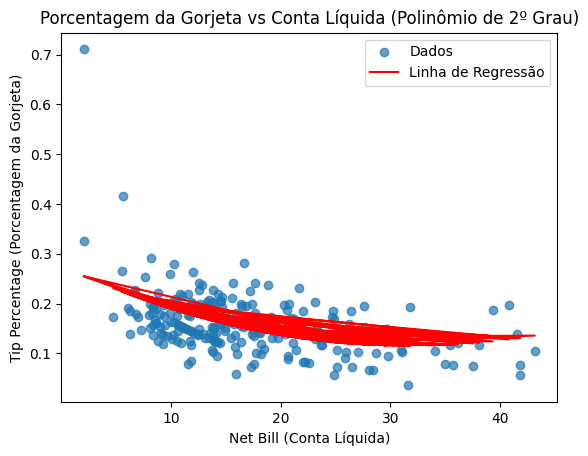

In [9]:
# Gráfico de dispersão
plt.scatter(gorjetas['net_bill'], gorjetas['tip_pct'], alpha=0.7, label='Dados')
plt.plot(
    gorjetas['net_bill'],
    modelo_poly.predict(X_poly),
    color='red',
    label='Linha de Regressão'
)
plt.xlabel('Net Bill (Conta Líquida)')
plt.ylabel('Tip Percentage (Porcentagem da Gorjeta)')
plt.title('Porcentagem da Gorjeta vs Conta Líquida (Polinômio de 2º Grau)')
plt.legend()
plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [10]:
# Calculando o logaritmo de tip_pct
gorjetas['log_tip_pct'] = np.log(gorjetas['tip_pct'])

# Ajustando o modelo de regressão do log de tip_pct por net_bill
X_log_tip = gorjetas[['net_bill', 'intercept']]
y_log_tip = gorjetas['log_tip_pct']
modelo_log_tip = sm.OLS(y_log_tip, X_log_tip).fit()

# Exibindo os resultados do modelo
print(modelo_log_tip.summary())

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     77.95
Date:                Fri, 27 Dec 2024   Prob (F-statistic):           2.18e-16
Time:                        00:14:00   Log-Likelihood:                -55.678
No. Observations:                 244   AIC:                             115.4
Df Residuals:                     242   BIC:                             122.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
net_bill      -0.0215      0.002     -8.829      0.0

In [11]:
# Predição do log(tip_pct)
gorjetas['pred_log_tip_pct'] = modelo_log_tip.predict(X_log_tip)

# Convertendo de volta para o espaço original (exp para tip_pct)
gorjetas['pred_tip_pct'] = np.exp(gorjetas['pred_log_tip_pct'])

# Calculando o R² para tip_pct
y_real = gorjetas['tip_pct']
y_pred = gorjetas['pred_tip_pct']
ss_res = ((y_real - y_pred) ** 2).sum()  # Soma dos resíduos ao quadrado
ss_tot = ((y_real - y_real.mean()) ** 2).sum()  # Soma total ao quadrado
r2_tip_pct = 1 - (ss_res / ss_tot)

# Exibindo o R²
print(f"R² do modelo para tip_pct (espaço original): {r2_tip_pct:.4f}")

R² do modelo para tip_pct (espaço original): 0.1926


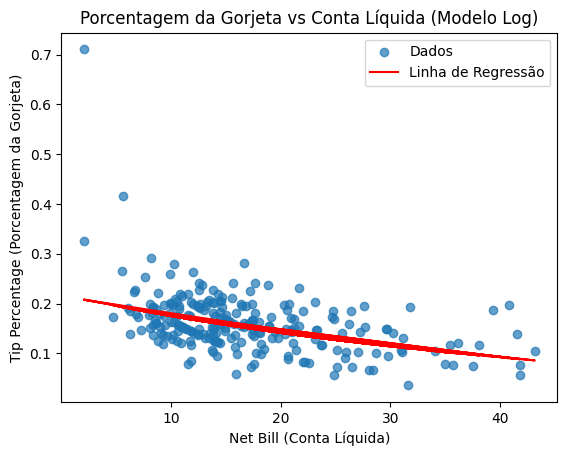

In [12]:
# Gráfico de dispersão
plt.scatter(gorjetas['net_bill'], gorjetas['tip_pct'], alpha=0.7, label='Dados')
plt.plot(
    gorjetas['net_bill'],
    gorjetas['pred_tip_pct'],
    color='red',
    label='Linha de Regressão'
)
plt.xlabel('Net Bill (Conta Líquida)')
plt.ylabel('Tip Percentage (Porcentagem da Gorjeta)')
plt.title('Porcentagem da Gorjeta vs Conta Líquida (Modelo Log)')
plt.legend()
plt.show()

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [13]:
# Calculando o logaritmo de net_bill e tip_pct
gorjetas['log_net_bill'] = np.log(gorjetas['net_bill'])
gorjetas['log_tip_pct'] = np.log(gorjetas['tip_pct'])

# Ajustando o modelo de regressão do log(tip_pct) por log(net_bill)
X_log_log = gorjetas[['log_net_bill', 'intercept']]
y_log_tip = gorjetas['log_tip_pct']
modelo_log_log = sm.OLS(y_log_tip, X_log_log).fit()

# Exibindo os resultados do modelo
print(modelo_log_log.summary())

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     94.10
Date:                Fri, 27 Dec 2024   Prob (F-statistic):           5.26e-19
Time:                        00:14:24   Log-Likelihood:                -49.670
No. Observations:                 244   AIC:                             103.3
Df Residuals:                     242   BIC:                             110.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
log_net_bill    -0.3874      0.040     -9.700   

In [14]:
# Predição do log(tip_pct)
gorjetas['pred_log_tip_pct'] = modelo_log_log.predict(X_log_log)

# Convertendo de volta para o espaço original (exp para tip_pct)
gorjetas['pred_tip_pct'] = np.exp(gorjetas['pred_log_tip_pct'])

# Calculando o R² para tip_pct no espaço original
y_real = gorjetas['tip_pct']
y_pred = gorjetas['pred_tip_pct']
ss_res = ((y_real - y_pred) ** 2).sum()  # Soma dos resíduos ao quadrado
ss_tot = ((y_real - y_real.mean()) ** 2).sum()  # Soma total ao quadrado
r2_tip_pct = 1 - (ss_res / ss_tot)

# Exibindo o R²
print(f"R² do modelo para tip_pct (espaço original): {r2_tip_pct:.4f}")

R² do modelo para tip_pct (espaço original): 0.3219


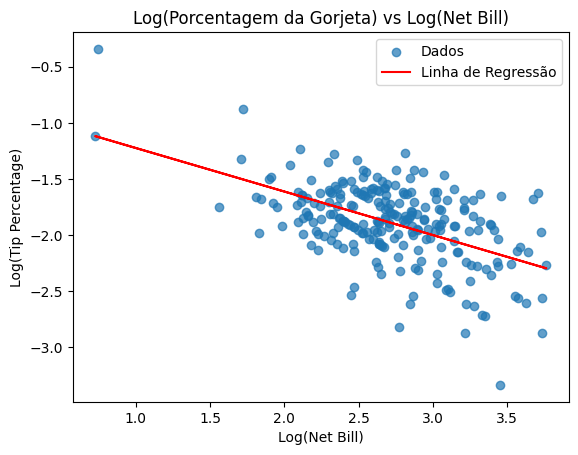

In [15]:
# Gráfico de dispersão
plt.scatter(gorjetas['log_net_bill'], gorjetas['log_tip_pct'], alpha=0.7, label='Dados')
plt.plot(
    gorjetas['log_net_bill'],
    modelo_log_log.predict(X_log_log),
    color='red',
    label='Linha de Regressão'
)
plt.xlabel('Log(Net Bill)')
plt.ylabel('Log(Tip Percentage)')
plt.title('Log(Porcentagem da Gorjeta) vs Log(Net Bill)')
plt.legend()
plt.show()

###  6. qual modelo resultou no melhor ajuste?

O modelo que resultou no melhor ajuste foi o do item 5 (log do tip_pct em função do log de net_bill), com um *R²* no espaço original de tip_pct igual a 0.3219. Esse valor é consideravelmente superior ao dos outros modelos, indicando que a transformação logarítmica para ambas as variáveis capturou melhor a relação entre elas.

Comparação:

Item 4:
*R²* = 0.1926 no espaço original de tip_pct.

Item 5:
*R²* = 0.3219 no espaço original de tip_pct, mostrando um ajuste superior.

Conclusão:
O modelo log-log (item 5) oferece o melhor desempenho entre os avaliados, possivelmente porque a transformação logarítmica suaviza a variabilidade e melhora a linearidade na relação entre tip_pct e net_bill.